### Introduction

- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

### import library and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

### image exploration

23

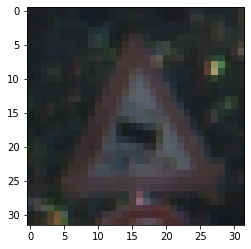

In [6]:
i = 2000
plt.imshow(X_train[i])
y_train[i]

### data precessing

In [7]:
from sklearn.utils import shuffle

In [8]:
X_train, y_train = shuffle(X_train, y_train)

### convert to gray scale image

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [12]:
X_test_gray.shape

(12630, 32, 32, 1)

### normalize to (-1, 1)

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

<Figure size 432x288 with 0 Axes>

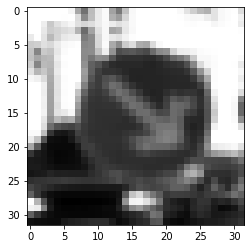

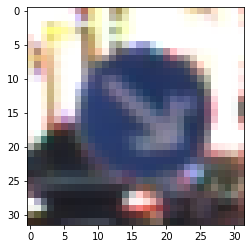

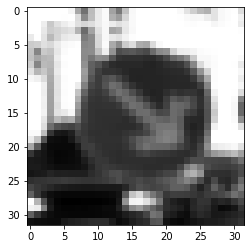

<Figure size 432x288 with 0 Axes>

In [14]:
i = 2000
# plt.imshow(X_train_gray_norm[i]) ##wrong data shape
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
y_train[i]
plt.figure()
plt.imshow(X_train[i].squeeze(), cmap = 'gray')
y_train[i]
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
y_train[i]
plt.figure()

### import packages again

In [15]:
from keras.models import Sequential

Using TensorFlow backend.


In [16]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

In [17]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dense(units = 43, activation  = 'softmax'))

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam (lr = 0.001), metrics = ['accuracy'])

In [21]:
history = model.fit(X_train_gray_norm, 
         y_train,
         batch_size = 500,
         epochs = 5,
         verbose = 1,
         validation_data = (X_validation_gray_norm, y_validation))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 19s 546us/step - loss: 3.1109 - acc: 0.1906 - val_loss: 2.5383 - val_acc: 0.2946
Epoch 2/5
34799/34799 [==============================] - 19s 538us/step - loss: 1.5666 - acc: 0.5565 - val_loss: 1.3307 - val_acc: 0.6084
Epoch 3/5
34799/34799 [==============================] - 18s 505us/step - loss: 0.8821 - acc: 0.7434 - val_loss: 0.9942 - val_acc: 0.6995
Epoch 4/5
34799/34799 [==============================] - 19s 536us/step - loss: 0.6228 - acc: 0.8257 - val_loss: 0.8339 - val_acc: 0.7465
Epoch 5/5
34799/34799 [==============================] - 17s 500us/step - loss: 0.4912 - acc: 0.8653 - val_loss: 0.7840 - val_acc: 0.7667


### model evaluation

In [22]:
score = model.evaluate(X_test_gray_norm,y_test)

12630/12630 [==============================] - 3s 230us/step


In [23]:
print('test accuracy : {}'.format(score[1]))

test accuracy : 0.7528899446047211


In [24]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [25]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

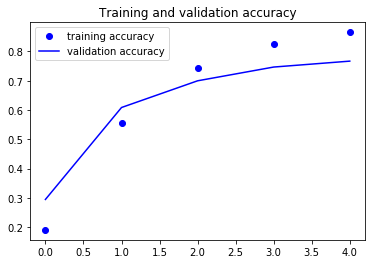

In [28]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

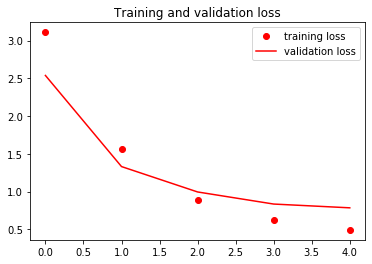

In [29]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()

## model prediction

In [30]:
prediction = model.predict_classes(X_test_gray_norm)

y_true = y_test

In [31]:
from sklearn.metrics import confusion_matrix

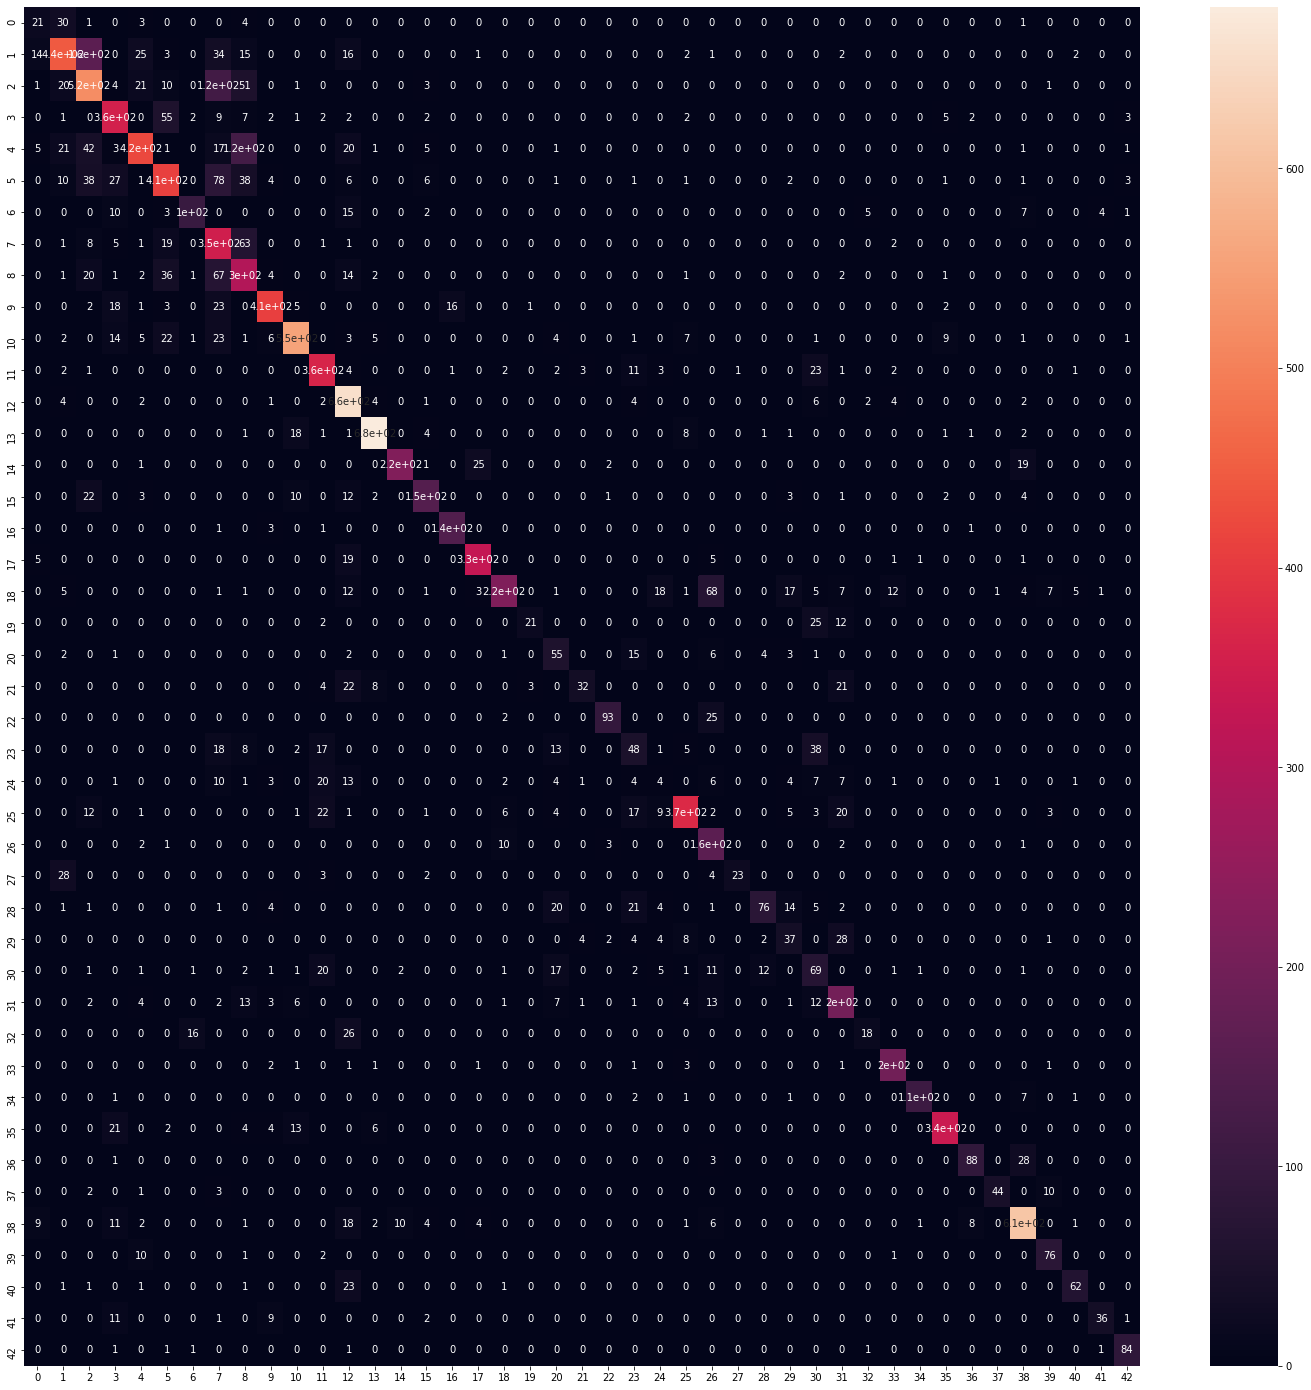

In [34]:
cm = confusion_matrix(y_true, prediction)

plt.figure(figsize= (25, 25))
sns.heatmap(cm, annot = True)


## visually compare true and prediction

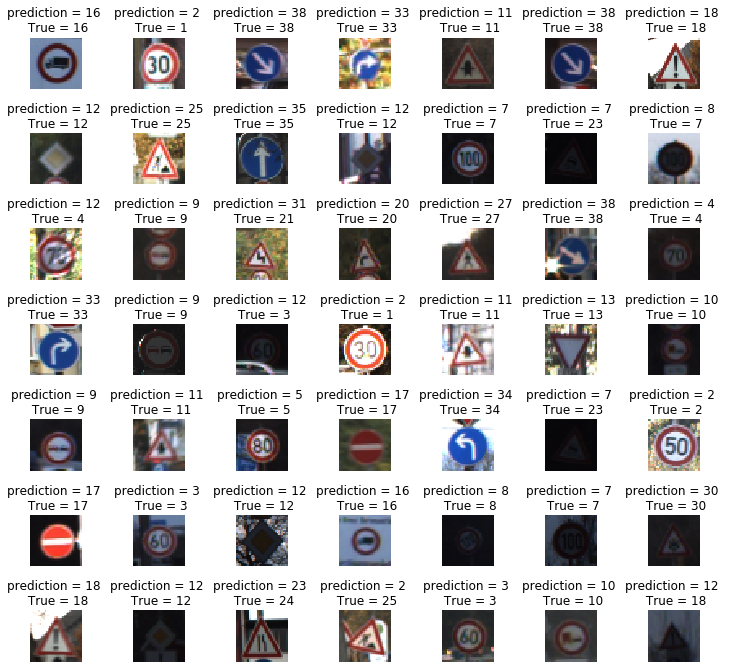

In [40]:
L, W = 7, 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction = {} \n True = {}'.format(prediction[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)